# Classification
1. Titanics Using Decision Trees
    * Get Dummies

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
X=df[["pclass","sex","age","sibsp","parch","fare"]]
y=df["survived"]

In [5]:
pd.get_dummies(df["alive"])

,no,yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


In [7]:
X = pd.get_dummies(X, columns=["sex"])

In [8]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [9]:
X["age"].fillna(X["age"].mean() , inplace=True)

In [10]:
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.000000,1,0,7.2500,0,1
1,1,38.000000,1,0,71.2833,1,0
2,3,26.000000,0,0,7.9250,1,0
3,1,35.000000,1,0,53.1000,1,0
4,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1
887,1,19.000000,0,0,30.0000,1,0
888,3,29.699118,1,2,23.4500,1,0
889,1,26.000000,0,0,30.0000,0,1


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
scalar = MinMaxScaler()
cols = ["age" , "fare"]

X[cols] = scalar.fit_transform(X[cols])

X[cols]

,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.367921,0.045771
889,0.321438,0.058556


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [18]:
clf = DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
clf.score(X_test,y_test)

0.770949720670391

In [21]:
y_pred = clf.predict(X_test)

In [23]:
print("Precision : ",precision_score(y_test, y_pred))
print("Recall : ",recall_score(y_test, y_pred))
print("f1_score : ",f1_score(y_test, y_pred))


Precision :  0.6455696202531646
Recall :  0.796875
f1_score :  0.7132867132867134


In [28]:
print("\t\t\tClassification Report\n\n\n",classification_report(y_test,y_pred))

			Classification Report


               precision    recall  f1-score   support

           0       0.87      0.76      0.81       115
           1       0.65      0.80      0.71        64

    accuracy                           0.77       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.79      0.77      0.77       179



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 28],
       [13, 51]], dtype=int64)

<AxesSubplot:>

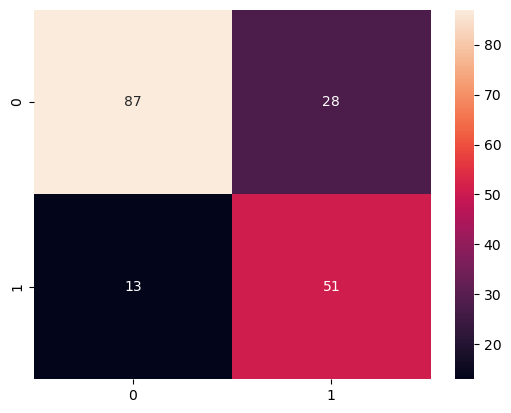

In [32]:
sns.heatmap(cm, annot=True)

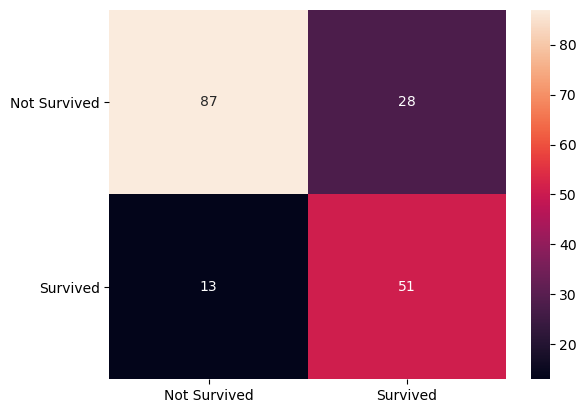

In [44]:
yticklabels=["Not Survived","Survived"]
yticks=["Not Survived","Survived"]
ax = sns.heatmap(cm, yticklabels=yticklabels,xticklabels=yticklabels, annot=True)
plt.yticks(rotation=0)
plt.show()

In [45]:
from sklearn import tree

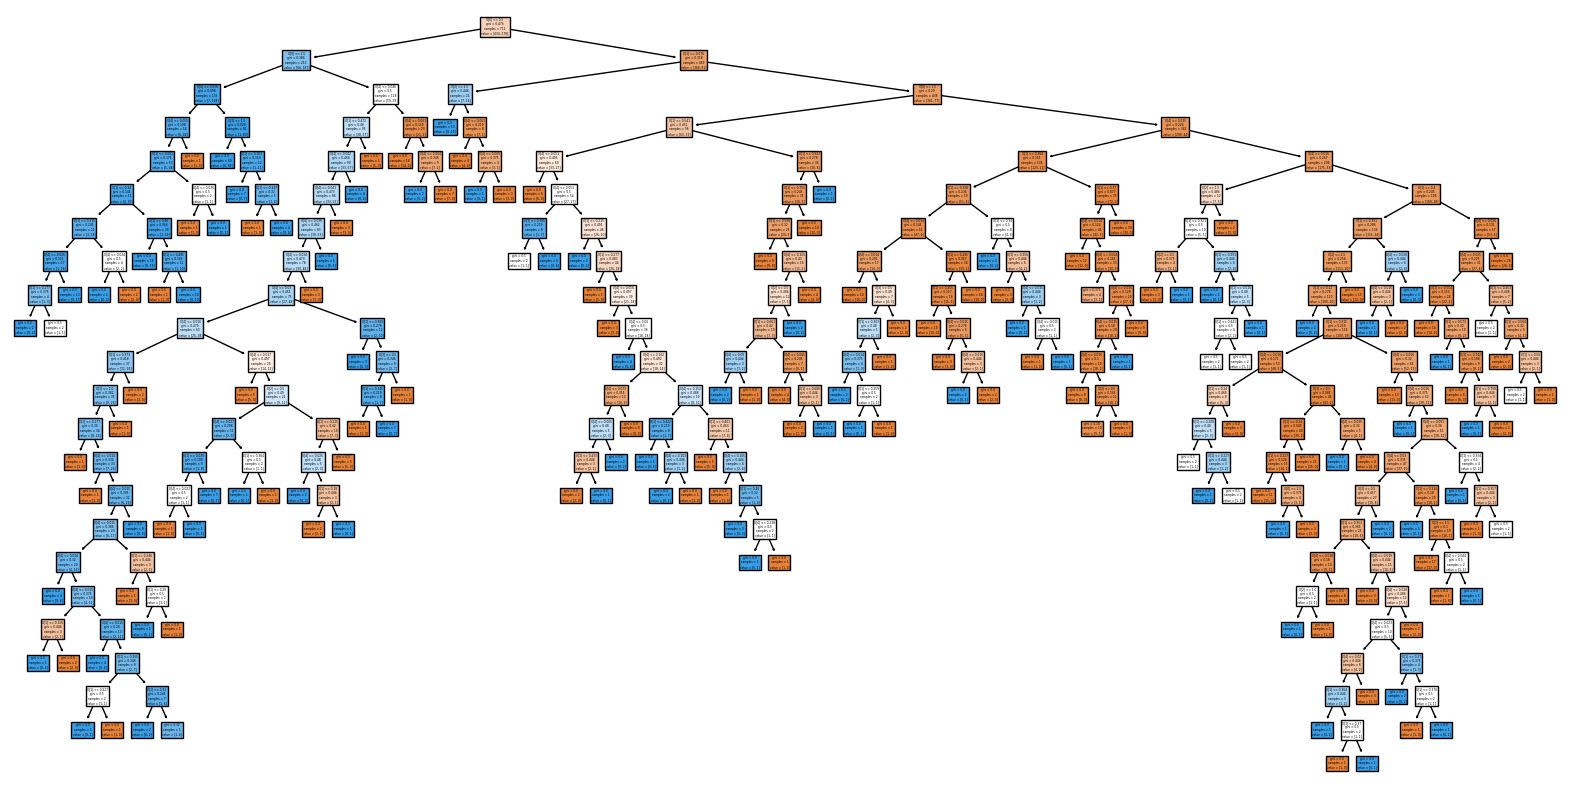

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf.fit(X_train,y_train), filled=True)
plt.show()
plt.savefig("Decision Tree Classifier.png", format="png",dpi=300)